### 1. 경사하강법

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 머신러닝 -> 지도학습 -> 데이터와 답 입력 -> 학습 -> 식 찾기
---
- y= 4*X +6
1. 위식에 근사한 데이터 생성
2. 답 생성

경사하강 사용해서 위 식에있는 계수 도출

근사 처리위해 random 사용

### Numpy Random function 3가지
---
 1. np.random.randint() : 정수난수 생성 (균일분포를 따르는)
 2. np.random.rand : (0~1사이 균일분포 내에서)실수난수 생성 
                     return -> matrix array (행렬)                  
 3. np.random.randn() : 표준정규분포 내에서 난수 생성
 4. np.random.shuffle() : 

In [8]:
np.random.seed(0)

# 위 식을 근사한 데이터 생성 * 노이즈(random)
X = 2* np.random.rand(100,1)
X[:10]

array([[1.09762701],
       [1.43037873],
       [1.20552675],
       [1.08976637],
       [0.8473096 ],
       [1.29178823],
       [0.87517442],
       [1.783546  ],
       [1.92732552],
       [0.76688304]])

In [10]:
# y: 종속변수
# X: 변수 (100개)
y = 4*X +6 + np.random.randn(100,1) # 노이즈 추가

[]

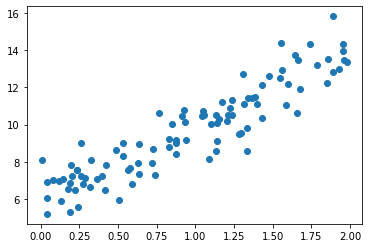

In [57]:
# 시각화
plt.scatter(X,y)


In [45]:
# 가중치(W1. W0)를 업데이트 할 w1_update, w2_update 반환
# 오차 : 원래값 - 예측값
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y) # 100
    # 먼저 반환할 값ㅂ을 저장할 배열 선언 (0으로 초기화)
    w1_update = np.zeros_like(w1) # w1 같은 크기의 배열 생성
    w0_update = np.zeros_like(w0)
    
    # 예측값을 (W0 + W1*X)구해야 한다.
    y_pred = w0 + np.dot(X, w1.T)
    
    # 오차값 
    diff = y - y_pred
    
    # w0 = 1
    w0_fact = np.ones((N,1)) # 100 배열 생성, 1로 초기화
    
    #
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_fact.T, diff))
    
    return w1_update, w0_update

In [46]:
# 경사 하강
# parameter : 데이터 ,원래답 ,반복횟수: 학습률 
def gradient_descent_steps(X, y, iters=10000):

    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for idx in range(iters):
        # 현재 가중치(w0,w1) - 수정된 가중치(get_weight_updates())
        w1_upd, w0_upd = \
        get_weight_updates(w1,w0,X,y, learning_rate=0.01)
        w1 = w1 - w1_upd
        w0 = w0 - w0_upd
    
    return w1, w0

In [47]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred)) / N # 평균제곱오차
    return cost

In [48]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)

In [49]:
# w0 : y절편 (원래값 : 6), w1 : 기울기 (원래값 : 4)

print('w1: {0:.3f}, w0: {1:.3f}'.format(w1[0,0],w0[0,0]))

w1: 3.944, w0: 5.893


In [50]:
# 원래값 - 예측값 실제 얼마나 오차가 있는지 확인
y_pred = w1[0,0]*X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

Gradient Descent Total Cost:0.9596


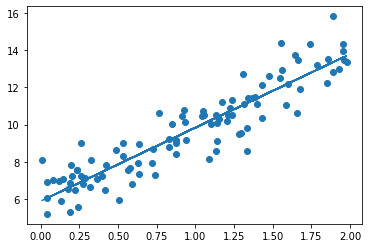

In [59]:
# 원래데이터 : 산점도 (데이터 분포) -> scatter
# 가중치를 적용한 직선 -> plot
plt.scatter(X, y)
plt.plot(X, y_pred)

### 다항회귀와 과대적합/과소적합 이해

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import PolynomialFeatures

C:\Users\TJ\anaconda3\envs\ml01-02\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# 다항회귀에 사용한 원데이터 생성 : 2*2
X = np.arange(4).reshape(2,2)
X

array([[0, 1],
       [2, 3]])

In [4]:
# degree = 2 데이터 파생
# 객체만 생성
poly = PolynomialFeatures(degree=2)

# 데이터 파생할 식 구성(학습)
poly.fit(X)

# 데이터 파생(변환)
poly_ftr = poly.transform(X)

print('원래 데이터\n',X)
print('변환된 데이터\n', poly_ftr)

원래 데이터
 [[0 1]
 [2 3]]
변환된 데이터
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [8]:
# X : 행렬, arange() => ndarray = > 브로드캐스팅
def polynomial_func(X):
    y = 1 + 2 * X + X ** 2 + X ** 3
    return y
X = np.arange(4).reshape(2,2)
print('일차 단항식 feature: \n', X)
y = polynomial_func(X)
print('일차 단항식 결정값(답): \n', y)

일차 단항식 feature: 
 [[0 1]
 [2 3]]
일차 단항식 결정값(답): 
 [[ 1  5]
 [17 43]]


In [9]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 feature: \n',poly_ftr)

3차 다항식 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
